In [156]:
import numpy as np
import nibabel as nib
from scipy import stats
from nilearn import image

from nilearn.plotting import plot_epi
from nilearn.plotting import plot_stat_map
from nilearn.image import new_img_like

In [157]:
data_path = '../ds000201-download/'

In [185]:
def get_voxel_map(subject_label):
    '''
    Return a map of the voxels of interest for determining which voxels in an fMRI scan are important in classifying sleep deprivation
    We are using the fMRI scans of the rest task
    
    Reference:
    https://nilearn.github.io/auto_examples/06_manipulating_images/plot_roi_extraction.html#build-a-statistical-test-to-find-voxels-of-interest
    '''
    subject_path = data_path + subject_label 
    
    ses_1_data_path = subject_path + f'/ses-1/func/{subject_label}_ses-1_task-rest_bold.nii.gz'
    ses_2_data_path = subject_path + f'/ses-2/func/{subject_label}_ses-2_task-rest_bold.nii.gz'
    
    ses_1_img = image.smooth_img(ses_1_data_path, fwhm=24)
    ses_2_img = image.smooth_img(ses_2_data_path, fwhm=24)
    
    mean_img_1 = image.mean_img(ses_1_img)
    mean_img_2 = image.mean_img(ses_2_img)
    
    plot_epi(mean_img_1, title='Session 1 Smoothed mean EPI', cut_coords=[0,0,0])
    plot_epi(mean_img_2, title='Session 2 Smoothed mean EPI', cut_coords=[0,0,0])
    
    ses_1_data = ses_1_img.get_fdata()
    ses_2_data = ses_2_img.get_fdata()
    
    print(ses_1_data.shape)
    print(ses_2_data.shape)
    _, p_values = stats.ttest_ind(ses_1_data, ses_2_data, axis = -1)
    
    # Use a log scale for p-values
    log_p_values = -np.log10(p_values)
    # NAN values to zero
    log_p_values[np.isnan(log_p_values)] = 0.
    #log_p_values[log_p_values > 240] = 240

    # First argument being a reference image and second argument should be p-values
    # data to convert to a new image as output. This new image will have same header
    # information as reference image.
    log_p_values_img = new_img_like(ses_1_img, log_p_values)

    # Now, we visualize log p-values image on functional mean image as background
    # with coordinates given manually and colorbar on the right side of plot (by
    # default colorbar=True)
    plot_stat_map(log_p_values_img, mean_img_1,
                  title="p-values", cut_coords=[25,62,18])
    
    log_p_values[log_p_values < 240] = 0
    log_p_values_img = new_img_like(ses_1_img, log_p_values)
    
    plot_stat_map(log_p_values_img, mean_img_1,
              title='Thresholded p-values', annotate=False,
              colorbar=False, cut_coords=[25,62,18])
    
    return log_p_values

In [186]:
def get_voxels_of_interest(subject_path):
    raise NotImplementedError

(128, 128, 49, 193)
(128, 128, 49, 196)


<ipython-input-185-ac7aaa5af817>:31: RuntimeWarning: divide by zero encountered in log10
  log_p_values = -np.log10(p_values)


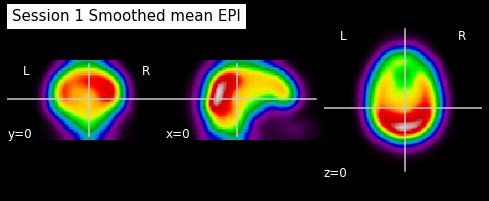

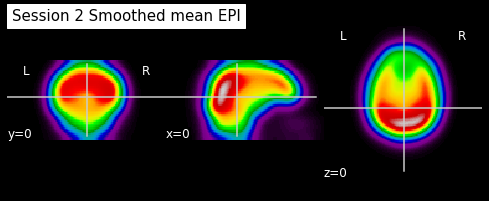

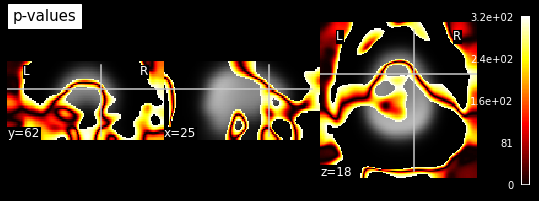

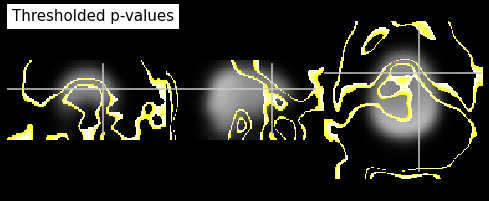

In [187]:
log_p_values = get_voxel_map('sub-9001')

In [188]:
print(log_p_values[log_p_values > 240].shape)
print(log_p_values.shape)

(508614,)
(128, 128, 49)


(128, 128, 49, 192)
(128, 128, 49, 193)


<ipython-input-185-ac7aaa5af817>:31: RuntimeWarning: divide by zero encountered in log10
  log_p_values = -np.log10(p_values)


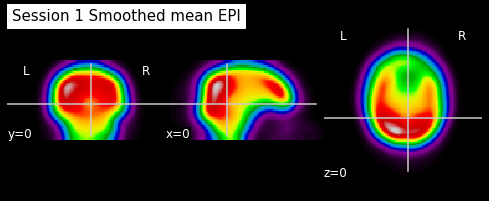

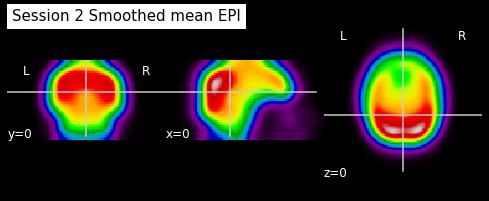

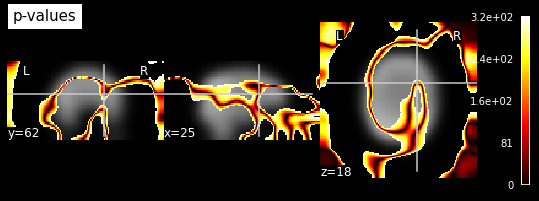

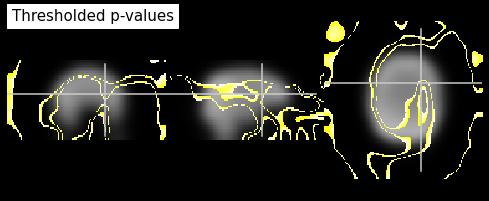

In [189]:
log_p_values = get_voxel_map('sub-9002')

In [ ]:
# Step 1, cut out the brain itself and ignore external information
# Step 2, Figure out how to extact clusters
x